### Analysis of Algorithms

This notebook will allow you to explore the order of growth of basic Python operations within the context of a function that you should be quite familiar with.

We have given you three different implementations of the `reverse_complement` function from mini-project 1.  In addition, we have provided you with a function that generates a random string of DNA.  This function will be useful for investigating how the running time of the various `reverse_complement` functions behave as you feed in larger and larger sequences of DNA.

First, read through the code and familiarize yourself with the three different implementations.  We have included a couple of doctests to  convince you that the implementations are correct.

In [13]:
""" Evaluate the performance of various DNA proessing algorithms """

from random import randint
import time

def generate_random_dna(n):
    """ Generate a random DNA sequence of length n """
    dna_list = []
    nucleotides = ['A','C','G','T']
    for i in range(n):
        r = randint(0,3)
        dna_list.append(nucleotides[r])
    return "".join(dna_list)

def get_complement(c):
    """ Returns the complimentary nucleotide to c """
    if c == 'A':
        return 'T'
    if c == 'C':
        return 'G'
    if c == 'G':
        return 'C'
    if c == 'T':
        return 'A'

def reverse_complement_1(dna):
    """ Method 2 for computing the reverse complementary sequence of DNA
        for the specfied DNA sequence
    
        dna: a DNA sequence represented as a string
        returns: the reverse complementary DNA sequence represented as a string
    >>> reverse_complement_1("ATGCCCGCTTT")
    'AAAGCGGGCAT'
    >>> reverse_complement_1("CCGCGTTCA")
    'TGAACGCGG'
    """
    return_val = ""
    for c in dna:
        return_val = get_complement(c) + return_val 
    return return_val

def reverse_complement_2(dna):
    """ Method 1 for Computing the reverse complementary sequence of DNA
        for the specfied DNA sequence
    
        dna: a DNA sequence represented as a string
        returns: the reverse complementary DNA sequence represented as a string
    >>> reverse_complement_2("ATGCCCGCTTT")
    'AAAGCGGGCAT'
    >>> reverse_complement_2("CCGCGTTCA")
    'TGAACGCGG'
    """
    return_val = []
    for c in reversed(dna):
        return_val.append(get_complement(c))
    return "".join(return_val)


def reverse_complement_3(dna):
    """ Method 1 for Computing the reverse complementary sequence of DNA
        for the specfied DNA sequence
    
        dna: a DNA sequence represented as a string
        returns: the reverse complementary DNA sequence represented as a string
    >>> reverse_complement_3("ATGCCCGCTTT")
    'AAAGCGGGCAT'
    >>> reverse_complement_3("CCGCGTTCA")
    'TGAACGCGG'
    """
    return_val = ""

    for c in reversed(dna):
        return_val = return_val + get_complement(c)
    return return_val

import doctest
doctest.testmod()

TestResults(failed=0, attempted=6)

Next, determine the order of growth of each of the three methods for computing the reverse complement.  You may find this text from ThinkPython useful:

> If you use the same loop to “add” a list of strings, the run time is quadratic because string concatenation is linear.

> The string method join is usually faster because it is linear in the total length of the strings. 

Also,

> As a rule of thumb, if the body of a loop is in $O(n^a)$ then the whole loop is in $O(n^{a+1})$. The exception is if you can show that the loop exits after a constant number of iterations.

We recommend that instead of staring at your computer screen, you write the implementations on the whiteboard and reason about the order of growth as a group using the whiteboard.

### Beware of bugs in the above code; I have only proved it correct, not tried it.
    - Donald Knuth

Next, you will be performing an experiment to see how these three techniques perform in practice.  What follows is a cell that times each of the implementations of `reverse_complement` on a DNA sequence of length given by the variable `dna_length`.  Try a few different values for `dna_length`.  What interesting trends do you observe?

In [14]:
dna_length = 1024

dna = generate_random_dna(dna_length)
start_time = time.time()
rev_complement = reverse_complement_1(dna)
stop_time = time.time()
print "reverse_complement_1 took {} seconds".format(stop_time - start_time)


dna = generate_random_dna(dna_length)
start_time = time.time()
rev_complement = reverse_complement_2(dna)
stop_time = time.time()
print "reverse_complement_2 took {} seconds".format(stop_time - start_time)


dna = generate_random_dna(dna_length)
start_time = time.time()
rev_complement = reverse_complement_3(dna)
stop_time = time.time()
print "reverse_complement_3 took {} seconds".format(stop_time - start_time)

reverse_complement_1 took 0.000786066055298 seconds
reverse_complement_2 took 0.000412940979004 seconds
reverse_complement_3 took 0.000494956970215 seconds


While the preceding code is correct, it is lacking quite a bit in terms of code style.  To reduce cut and paste implement the function `test_reverse_complement` describe below.  We have already shown you how to use the function to replace the code in the preceding code cell.

In [15]:
def test_reverse_complement(f, dna_length):
    """ Returns the number of seconds for the function f
        to compute the reverse complement of a DNA sequence
        of length `dna_length` """
    # your implementation here
    pass

dna_length = 1024

print "reverse_complement_1 took {} seconds". \
    format(test_reverse_complement(reverse_complement_1, dna_length))

print "reverse_complement_2 took {} seconds". \
    format(test_reverse_complement(reverse_complement_2, dna_length))

print "reverse_complement_3 took {} seconds". \
    format(test_reverse_complement(reverse_complement_3, dna_length))

reverse_complement_1 took None seconds
reverse_complement_2 took None seconds
reverse_complement_3 took None seconds


Next, we will be exploring the relationship between input size and running time in more detail.  Using matplotlib, create a plot of the running time for each of the reverse complement functions (in seconds) versus the input size.  If you haven't used matplotlib before, you may want to consult [this reference](http://matplotlib.org/users/pyplot_tutorial.html).  For your convenience here is an example of constructing a plot.

If you don't have matplotlib installed, run the following command at the linux terminal:

> $ sudo apt-get install python-matplotlib

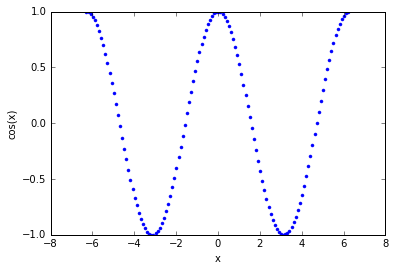

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange
from math import pi, cos

xs = arange(-2*pi,2*pi,.1)
ys = []
for x in xs:
    ys.append(cos(x))

plt.plot(xs, ys, 'b.')
plt.ylabel('cos(x)')
plt.xlabel('x')
plt.show()

Create three plots, one for each implementation of `get_reverse_complement`.  The plot should show the run time for each implementation on inputs of different sizes.  In order to see interesting trends, you will want to search over an exponentially spaced range of input sizes (e.g. `xs = [1024, 2048, 4096, 8192, ...]`).  You should avoid testing on very small inputs since these will likely muddy your results.

As a final analysis, create a single log-log plot that shows the running time of the three algorithms versus the size of the input.  To create a log-log plot, you can substitute the function `plt.plot` with `plt.loglog`.  To plot multiple quantities in the same plot, just call `plt.loglog` multiple times before calling `plt.show`.  Additionally, you can add a legend to your plot using following command (this assumes you called plt.loglog in the order specified below):

```plt.legend(['reverse_complement_1', 'reverse_complement_2', 'reverse_complement_3'], loc='best')```

Assuming `reverse_complement_1` is $O(n^2)$ and the other two are $O(n)$, what quantity could you measure in the graph above that would be consistent with this analysis?

How do your empirical results square with the order of growths you predicted?  If there are inconsistencies, do you have a theory for what might be causing them?